# Import Libraries

In [25]:

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from datetime import datetime

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import Ridge, Lasso

# Tree-Based Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Nearest Neighbors Models
from sklearn.neighbors import KNeighborsClassifier

# Support Vector Machine
from sklearn.svm import SVC

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest, chi2

## Load the data

In [2]:
data = pd.read_excel("./BikeBuyers2.xlsx")
print(data.info())
# 备份原始数据
data_backup = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProspectiveBuyerKey   2059 non-null   int64         
 1   ProspectAlternateKey  2059 non-null   int64         
 2   FirstName             2059 non-null   object        
 3   MiddleName            1207 non-null   object        
 4   LastName              2059 non-null   object        
 5   BirthDate             2059 non-null   datetime64[ns]
 6   MaritalStatus         2059 non-null   object        
 7   Gender                2059 non-null   object        
 8   EmailAddress          2059 non-null   object        
 9   YearlyIncome          1874 non-null   float64       
 10  TotalChildren         2018 non-null   float64       
 11  NumberChildrenAtHome  2059 non-null   int64         
 12  Education             2059 non-null   object        
 13  Occupation        

In [3]:
data.head()

,ProspectiveBuyerKey,ProspectAlternateKey,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,NumberCarsOwned,AddressLine1,AddressLine2,City,StateProvinceCode,PostalCode,Phone,Salutation,Amount,Category
0,1,21596444800,Adam,NaN,Alexander,1940-07-02,M,M,aalexander@lucernepublishing.com,40000.0,...,2.0,566 S. Main,NaN,Cedar City,UT,84720,516-555-0187,Mr.,0,Category 5
1,2,3003,Adrienne,NaN,Alonso,1944-09-06,M,F,aalonso@alpineskihouse.com,80000.0,...,2.0,7264 St. Peter Court,NaN,Colma,CA,94014,607-555-0119,Ms.,4,Category 3
2,3,1077,Alfredo,B,Alvarez,1958-10-01,S,M,aalvarez@fineartschool.net,130000.0,...,4.0,8850 Via Del Sol,NaN,Lynnwood,WA,98036,1 (11) 500 555-0143,Mr.,1,Category 4
3,4,4779,Arthur,A,Arun,1979-09-23,S,M,aarun@adventure-works.com,50000.0,...,2.0,7515 Royal Oak Rd.,NaN,Chula Vista,CA,91910,403-555-0186,Mr.,4,Category 1
4,5,38032399400,Andrea,M,Bailey,1959-10-28,M,F,abailey@lucernepublishing.com,10000.0,...,0.0,2500 North Stemmons Freeway,NaN,Dallas,TX,75201,1 (11) 500 555-0113,Ms.,4,Category 9


# **Data Management and Understanding**
Deal with the data and understand the data

## Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. 

In [4]:
columns_to_drop = ['FirstName', 'MiddleName', 'LastName', 'EmailAddress', 'AddressLine1', 'StateProvinceCode', 'AddressLine2', 'Salutation', 'Phone']
data = data.drop(columns=columns_to_drop)

In [5]:
# add your code here for data cleaning of the adventure data set INCOME
data.duplicated().any()

False

In [6]:
data.isnull().any()

ProspectiveBuyerKey     False
ProspectAlternateKey    False
BirthDate               False
MaritalStatus           False
Gender                  False
YearlyIncome             True
TotalChildren            True
NumberChildrenAtHome    False
Education               False
Occupation              False
HouseOwnerFlag          False
NumberCarsOwned          True
City                    False
PostalCode              False
Amount                  False
Category                False
dtype: bool

In [7]:
# Columns with NaN values to be replaced with mean
columns_with_nan = [ 'YearlyIncome', 'TotalChildren', 'NumberCarsOwned']

# Replace NaN with mean (only for numerical columns, and apply specific logic for others)
for column in columns_with_nan:
    if data[column].dtype == 'object':
        data[column].fillna('Unknown', inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

C:\Users\khawl\AppData\Local\Temp\ipykernel_9308\2250733237.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [8]:
# Calculate age
current_year = datetime.now().year
data['Age'] = current_year - data['BirthDate'].dt.year

# Rearrange columns to place 'Age' as the third column
columns = data.columns.tolist()
columns.remove('Age')  # Remove 'Age' from the list
columns.insert(2, 'Age')  # Insert 'Age' at the third position

# Drop the DOB column
data.drop(columns=['BirthDate'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProspectiveBuyerKey   2059 non-null   int64  
 1   ProspectAlternateKey  2059 non-null   int64  
 2   MaritalStatus         2059 non-null   object 
 3   Gender                2059 non-null   object 
 4   YearlyIncome          2059 non-null   float64
 5   TotalChildren         2059 non-null   float64
 6   NumberChildrenAtHome  2059 non-null   int64  
 7   Education             2059 non-null   object 
 8   Occupation            2059 non-null   object 
 9   HouseOwnerFlag        2059 non-null   int64  
 10  NumberCarsOwned       2059 non-null   float64
 11  City                  2059 non-null   object 
 12  PostalCode            2059 non-null   int64  
 13  Amount                2059 non-null   int64  
 14  Category              2059 non-null   object 
 15  Age                  

In [10]:
categorical_data = data

In [11]:
# Replace with appropriate columns from dataset
for column in ['Gender', 'Education', 'Occupation', 'MaritalStatus', 'City', 'Category']:
    data[column] = data[column].astype('category').cat.codes

In [12]:
# Define the threshold for purchase (e.g., any positive amount indicates a purchase)
data['BuyFlag'] = (data['Amount'] > 0).astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProspectiveBuyerKey   2059 non-null   int64  
 1   ProspectAlternateKey  2059 non-null   int64  
 2   MaritalStatus         2059 non-null   int8   
 3   Gender                2059 non-null   int8   
 4   YearlyIncome          2059 non-null   float64
 5   TotalChildren         2059 non-null   float64
 6   NumberChildrenAtHome  2059 non-null   int64  
 7   Education             2059 non-null   int8   
 8   Occupation            2059 non-null   int8   
 9   HouseOwnerFlag        2059 non-null   int64  
 10  NumberCarsOwned       2059 non-null   float64
 11  City                  2059 non-null   int16  
 12  PostalCode            2059 non-null   int64  
 13  Amount                2059 non-null   int64  
 14  Category              2059 non-null   int8   
 15  Age                  

## Visualizations

Include all the visualizations you made in this section. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

### Hist Plot

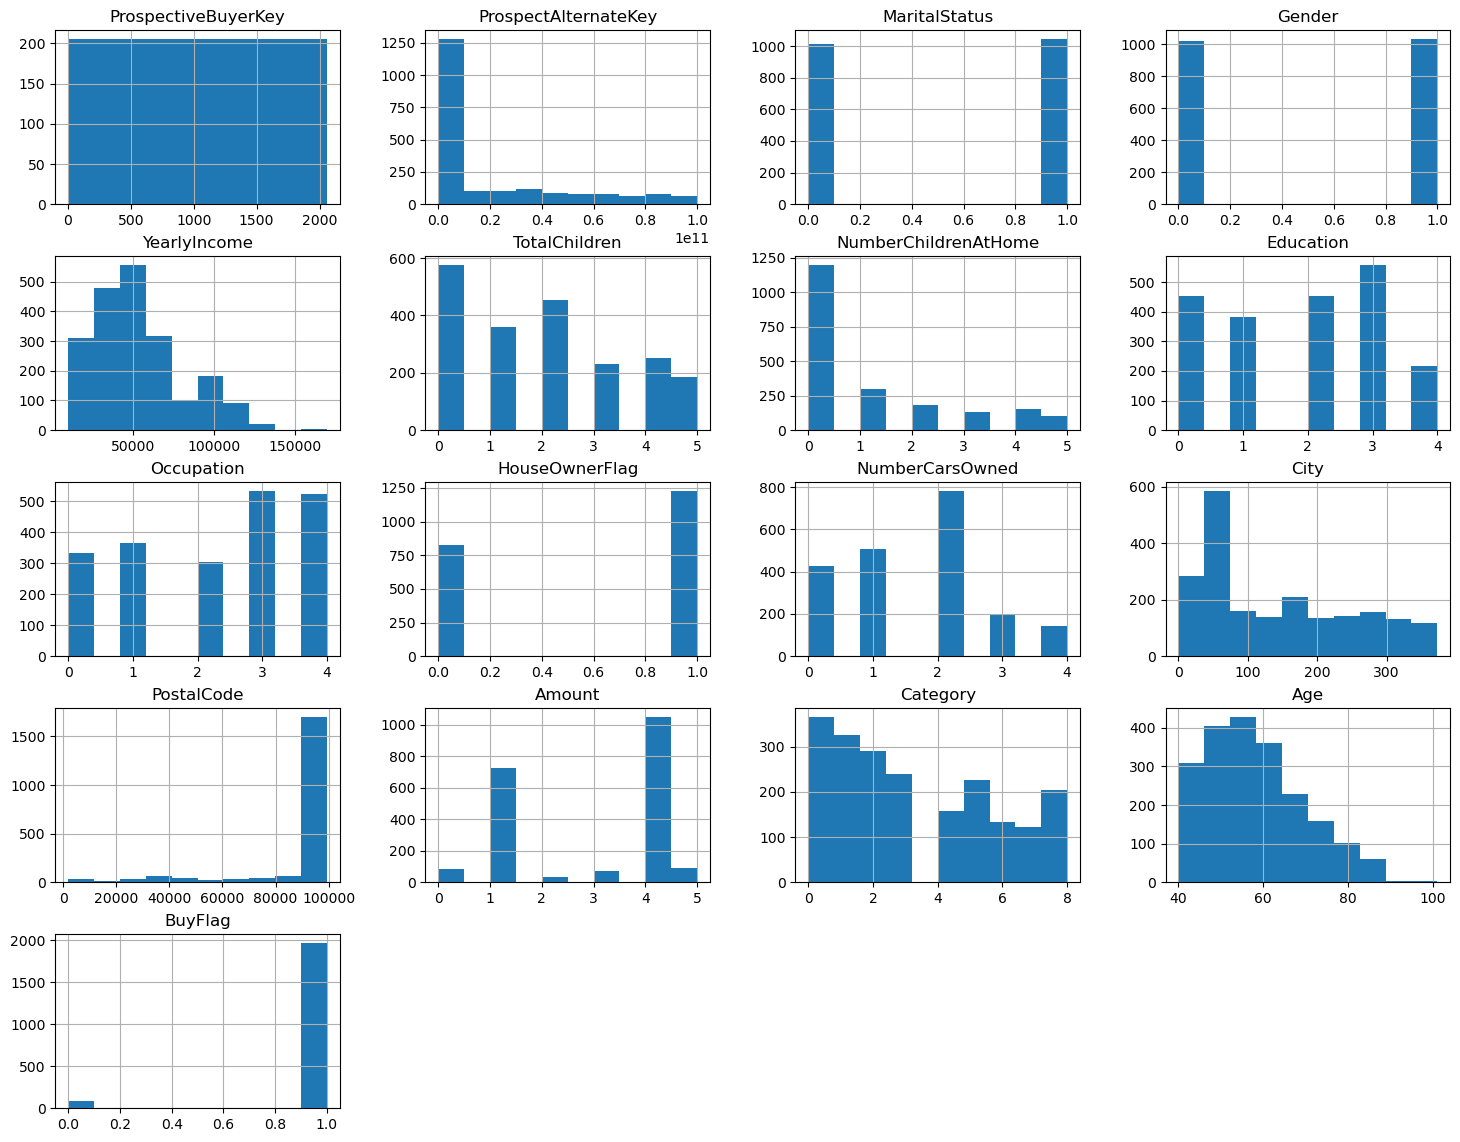

In [14]:
# Add visualizations here that you made to present insights in the adventure data. Create a new codeblock for every graph. Add markdown blocks to describe your graphs where necessary.
# Histograms for distribution
data.hist(figsize=(18, 14))
plt.show()

### Correlation Analysis

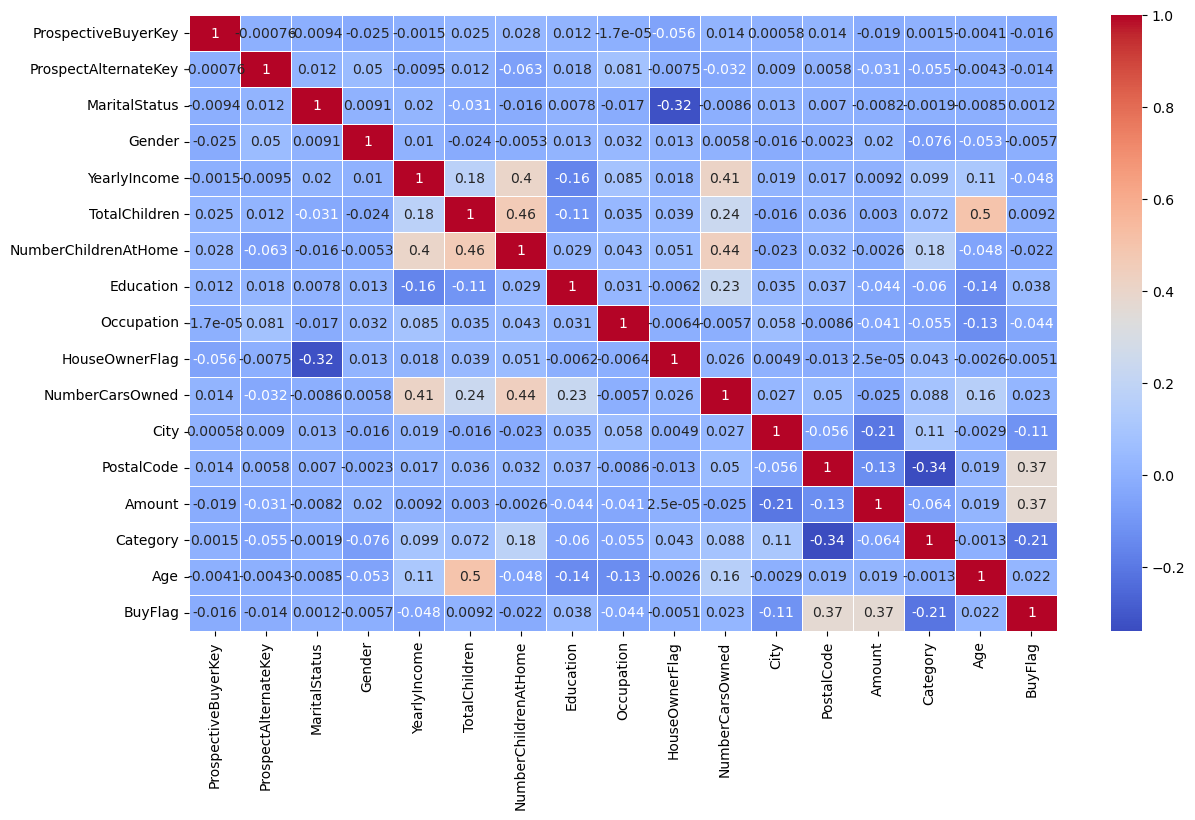

In [15]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

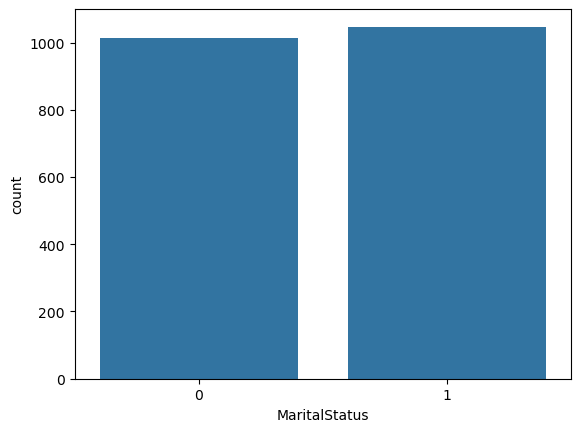

In [16]:
# Bar chart 
sns.countplot(x='MaritalStatus', data=data)
plt.show()

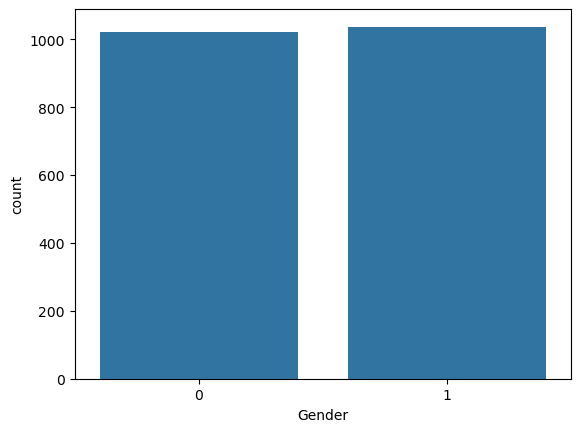

In [17]:
sns.countplot(x='Gender', data=data)
plt.show()

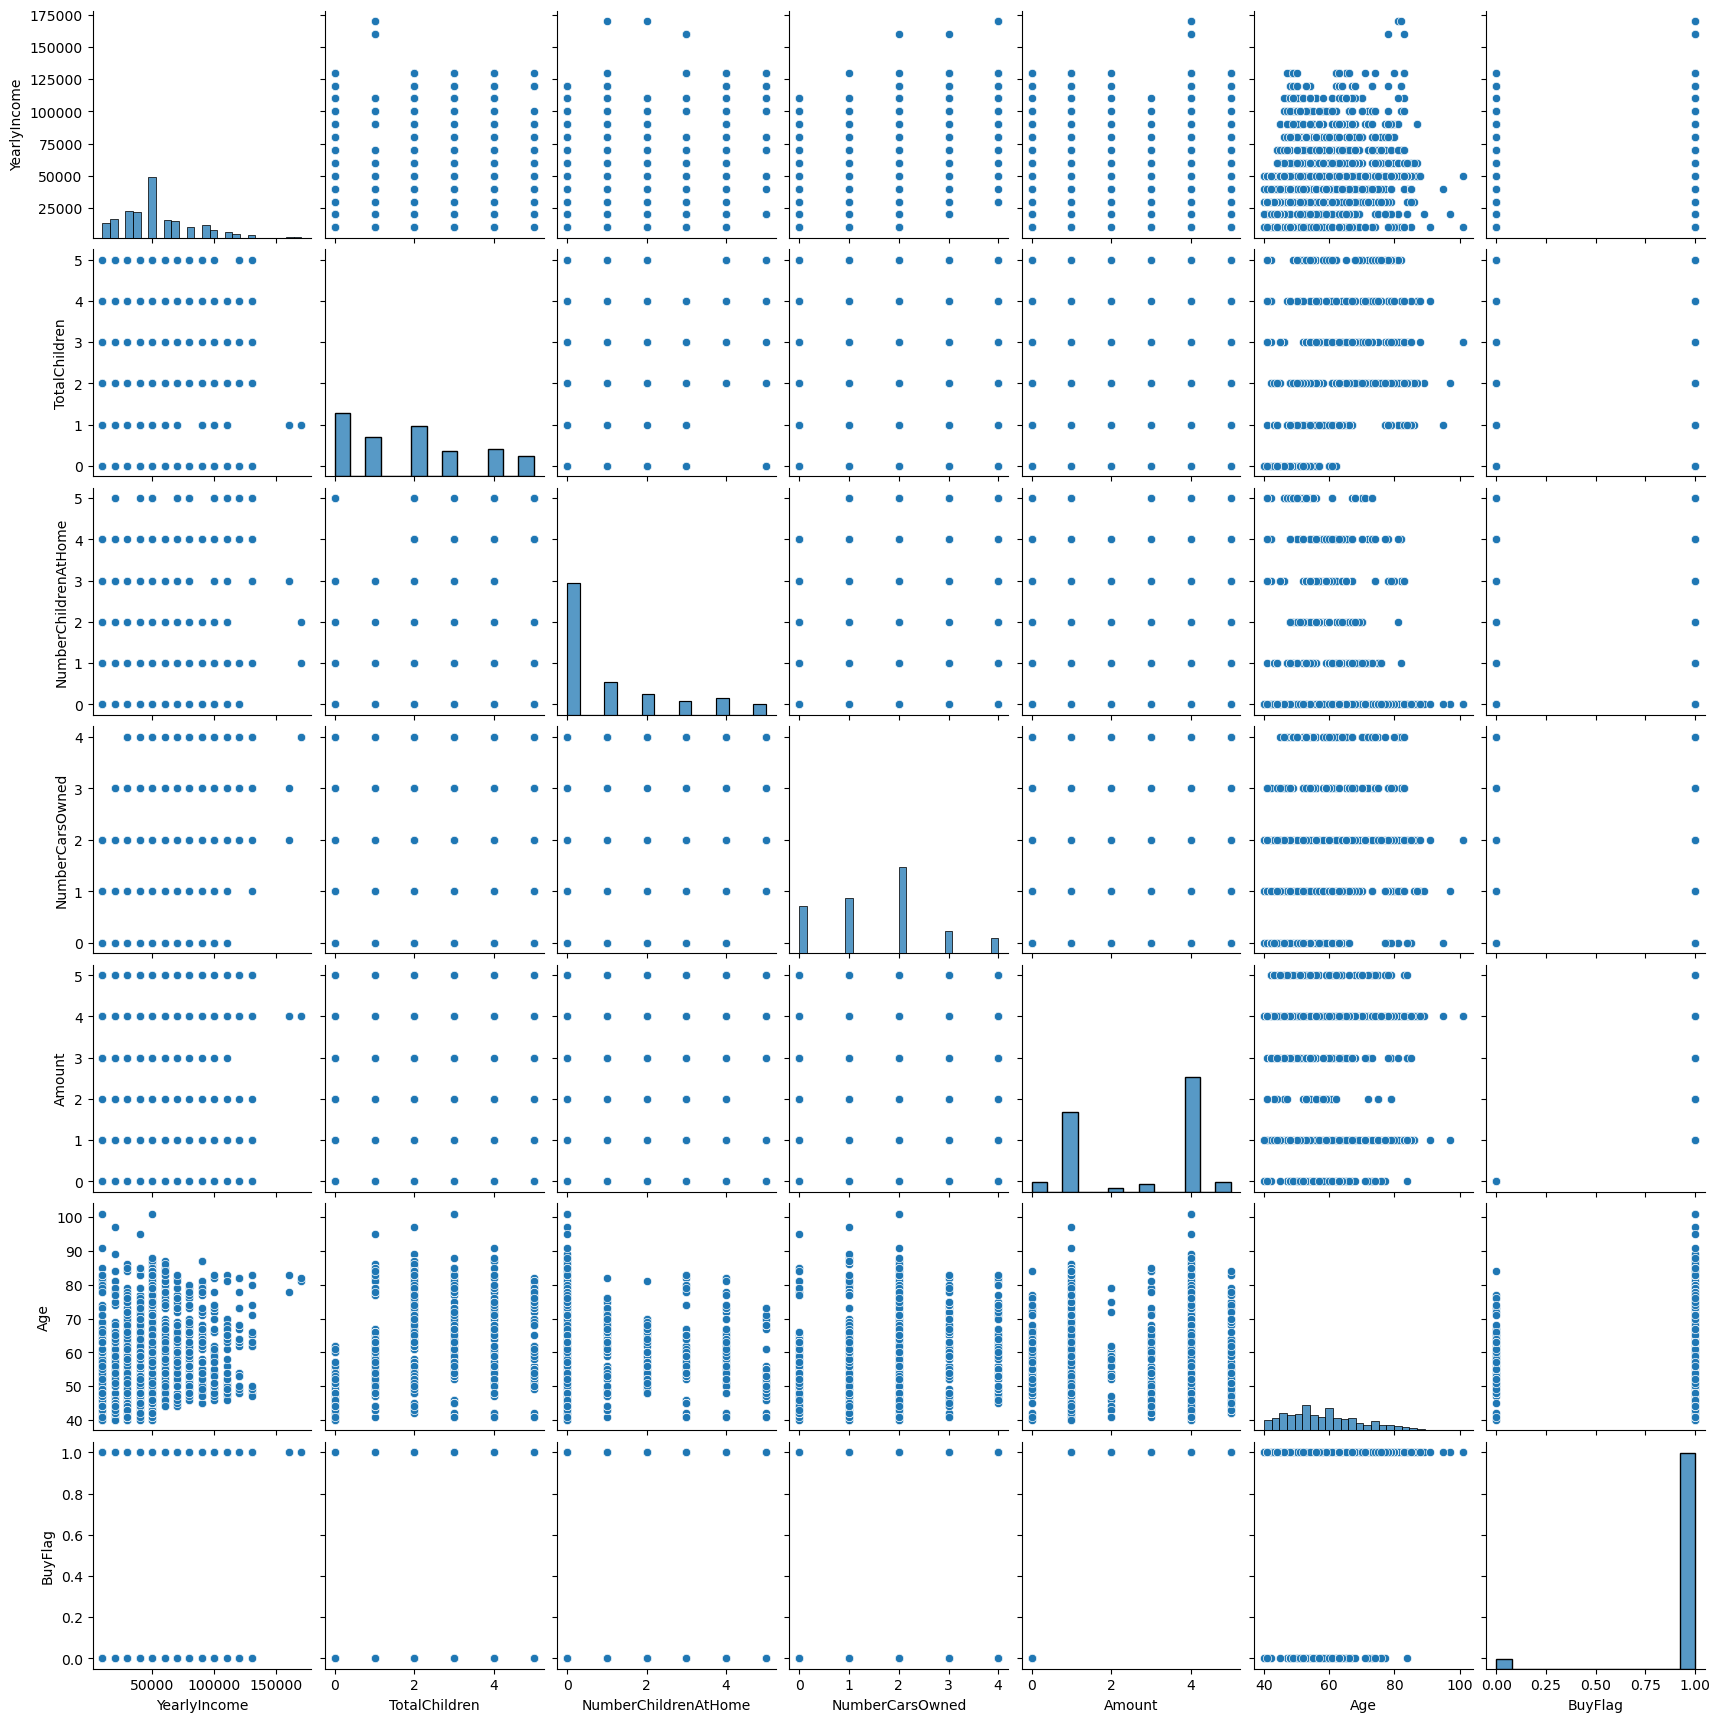

In [18]:
# Pairplots 
sns.pairplot(data[['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'Amount', 'Age', 'BuyFlag']])
plt.show()


# Machine Learning

### Identifying basic Machine Learning applications.

In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the adventure dataset.

❗Remember! All your package imports should be on top of this notebook.

## Simple machine learning modelling pipeline

## Supervised learning

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

# Define the features (excluding 'Buyflag' from features list)
features = data.drop(columns=['BuyFlag'])

# Separate the target variable
target = data['BuyFlag']

# Using SelectKBest with Chi-Square Test for categorical target variable
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(features, target)

# Get scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to display feature scores and p-values
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Score': scores,
    'P-Value': p_values
})

# Sort features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Define the number of top features you want to select
top_n = 10  # For example, select top 10 features

# Get the list of top features
top_features = feature_scores.head(top_n)['Feature'].tolist()
top_features

['ProspectAlternateKey',
 'PostalCode',
 'YearlyIncome',
 'City',
 'Amount',
 'Category',
 'ProspectiveBuyerKey',
 'Occupation',
 'Education',
 'NumberChildrenAtHome']

In [29]:
# Define features and target
features = data[['ProspectAlternateKey', 'PostalCode', 'YearlyIncome', 'City', 'Amount', 'Category', 'ProspectiveBuyerKey', 'Occupation', 'Education', 'NumberChildrenAtHome']]
target = data['BuyFlag']

# Preprocess numerical features using standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Define and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9724919093851133
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        36
           1       0.97      1.00      0.99       582

    accuracy                           0.97       618
   macro avg       0.99      0.76      0.84       618
weighted avg       0.97      0.97      0.97       618



In [30]:
# Get the count of each value in the 'BuyFlag' column
buyflag_counts = data['BuyFlag'].value_counts()

# Print the counts
print(buyflag_counts)

BuyFlag
1    1972
0      87
Name: count, dtype: int64


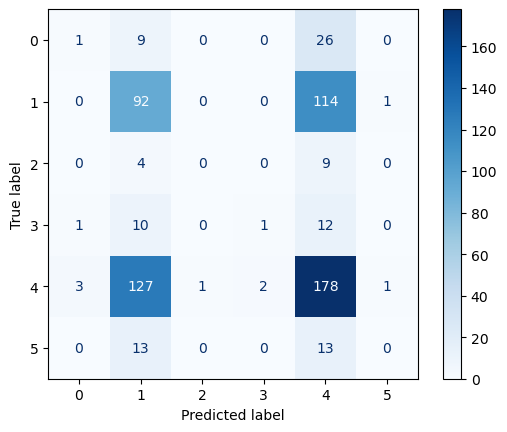

Accuracy: 0.4401294498381877
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.03      0.05        36
           1       0.36      0.44      0.40       207
           2       0.00      0.00      0.00        13
           3       0.33      0.04      0.07        24
           4       0.51      0.57      0.54       312
           5       0.00      0.00      0.00        26

    accuracy                           0.44       618
   macro avg       0.23      0.18      0.18       618
weighted avg       0.40      0.44      0.41       618



In [28]:
# Define features and target
#features = data[['ProspectAlternateKey', 'PostalCode', 'YearlyIncome', 'City', 'Amount', 'Category', 'ProspectiveBuyerKey', 'Occupation', 'Education', 'NumberChildrenAtHome']]
features = data[['ProspectiveBuyerKey', 'Age', 'MaritalStatus', 'Gender','Occupation','YearlyIncome', 
                 'TotalChildren', 'NumberChildrenAtHome','Education','HouseOwnerFlag', 'NumberCarsOwned',]]
target = data['Amount']

# Preprocess numerical features using standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Define and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

In [1]:
#HJSDQKwda